- [PCOS dataset](https://www.kaggle.com/datasets/lucass0s0/polycystic-ovary-syndrome-pcos) from Kaggle
- *'This is a synthetic dataset about women with Polycystic Ovary Syndrome (PCOS), generated according to the Rotterdam Criteria. The Rotterdam Criteria, established in 2003 by an international consensus of experts, defines that, for a woman to be diagnosed with the syndrome, she must meet at least two of the three criteria.'*
- *'Since this is a synthetic dataset, some peculiarities may be present. Therefore, it is essential that the analysis be accompanied by a medical specialist, especially for commercial use.'*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
pcos = pd.read_csv('pcos.csv')

In [3]:
# initial data inspection
pcos.shape
pcos.info()
print(pcos.head())
pcos.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        3000 non-null   int64  
 1   BMI                        3000 non-null   float64
 2   Menstrual_Irregularity     3000 non-null   int64  
 3   Testosterone_Level(ng/dL)  3000 non-null   float64
 4   Antral_Follicle_Count      3000 non-null   int64  
 5   PCOS_Diagnosis             3000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 140.8 KB
   Age   BMI  Menstrual_Irregularity  Testosterone_Level(ng/dL)  \
0   29  21.2                       0                       46.1   
1   20  20.5                       0                       59.4   
2   23  23.1                       0                       69.3   
3   19  32.7                       1                       77.7   
4   19  25.9                       0                       

Index(['Age', 'BMI', 'Menstrual_Irregularity', 'Testosterone_Level(ng/dL)',
       'Antral_Follicle_Count', 'PCOS_Diagnosis'],
      dtype='object')

- Dataset contains 3000 observations with 6 variables
- Menstrual_Irregularity, PCOS_Diagnosis - are binary data types (0 for false, 1 for positive)

In [4]:
# check for any missing values
pcos.isna().sum()

Age                          0
BMI                          0
Menstrual_Irregularity       0
Testosterone_Level(ng/dL)    0
Antral_Follicle_Count        0
PCOS_Diagnosis               0
dtype: int64

- No missing values

In [10]:
# rename column names
pcos = pcos.rename(columns={'Age':'age', 'BMI':'bmi','Menstrual_Irregularity':'irregularity',
                           'Testosterone_Level(ng/dL)':'testosterone',
                           'Antral_Follicle_Count':'follicleCount','PCOS_Diagnosis':'pcosDiagnosis'})

# descriptive analysis
pcos.describe()

,age,bmi,irregularity,testosterone,follicleCount,pcosDiagnosis
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,30.052667,23.646000,0.289333,57.228267,10.732333,0.200000
std,7.549982,4.510006,0.453529,18.171066,8.471478,0.400067
min,18.000000,8.500000,0.000000,20.500000,3.000000,0.000000
25%,24.000000,20.800000,0.000000,45.200000,5.000000,0.000000
50%,30.000000,23.400000,0.000000,53.200000,8.000000,0.000000
75%,36.000000,26.300000,1.000000,64.100000,11.000000,0.000000
max,44.000000,44.700000,1.000000,136.400000,39.000000,1.000000


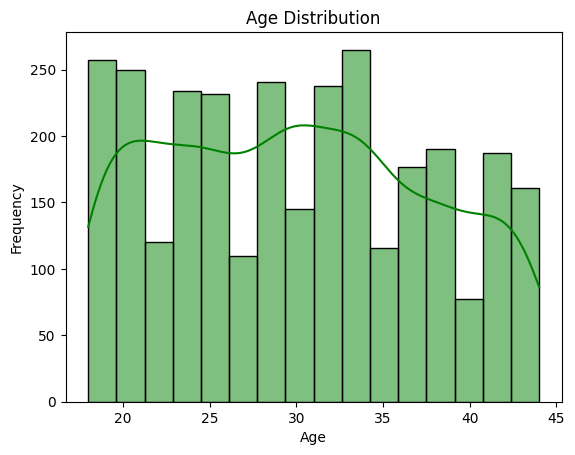

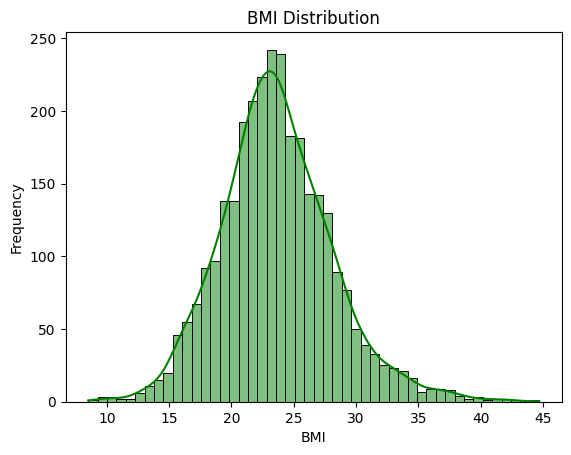

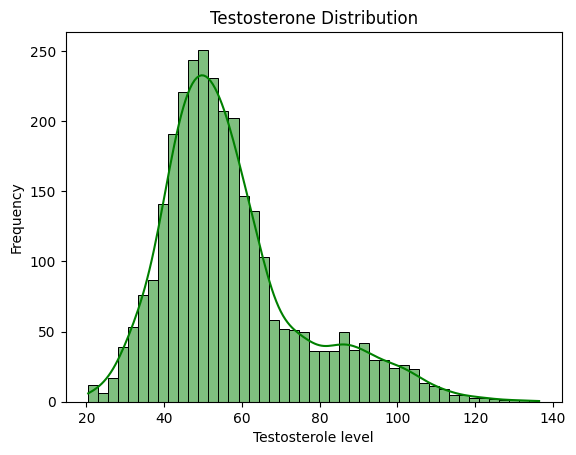

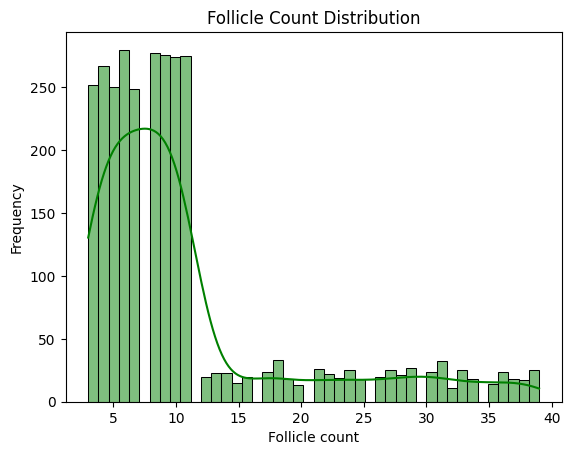

In [60]:
# Univariate analysis 
# Age distribution
sns.histplot(data=pcos, x='age', kde=True, color='green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# BMI distribution
sns.histplot(data=pcos,x='bmi',kde=True, color= 'green')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

# Testosterone distribution
sns.histplot(data=pcos,x='testosterone',kde=True,color='green')
plt.title('Testosterone Distribution')
plt.xlabel('Testosterole level')
plt.ylabel('Frequency')
plt.show()

# Follicle distribution
sns.histplot(data=pcos,x='follicleCount',kde=True,color='green')
plt.title('Follicle Count Distribution')
plt.xlabel('Follicle count')
plt.ylabel('Frequency')
plt.show()

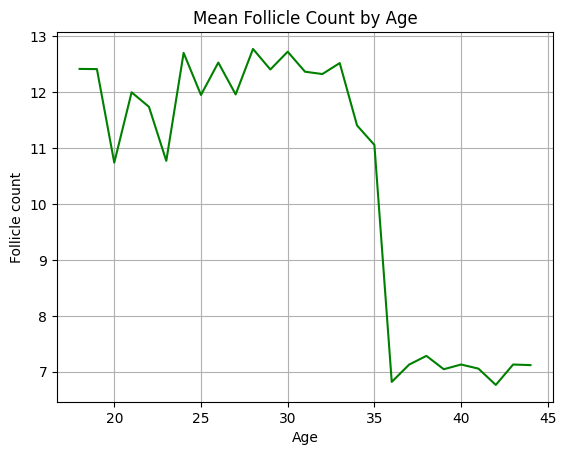

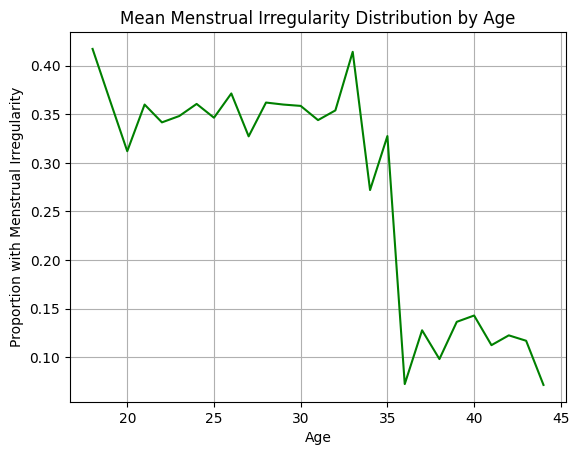

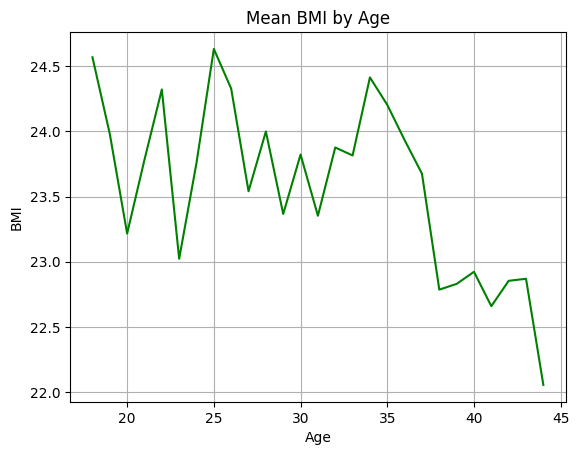

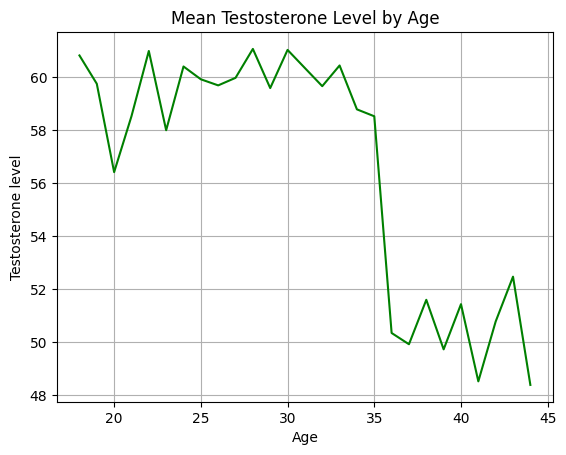

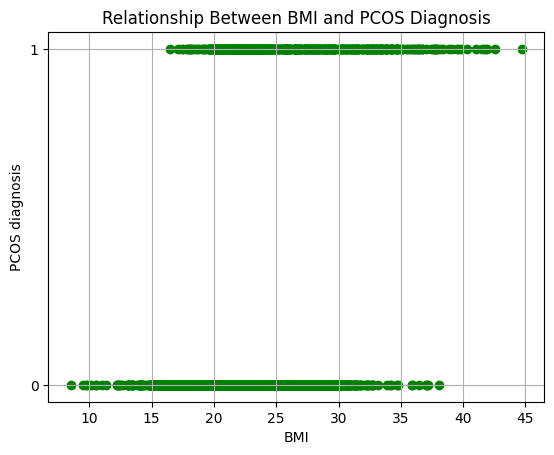

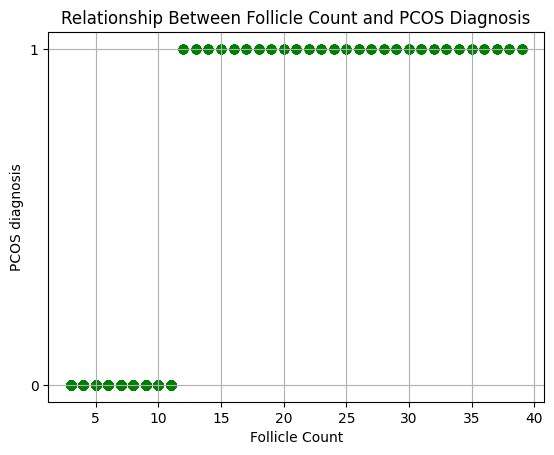

In [63]:
# Bivariate analysis
# Relationship between age and follicle count
follicleCountAggregate = pcos.groupby('age')['follicleCount'].mean()

follicleCountAggregate.plot(color='green')
plt.title('Mean Follicle Count by Age')
plt.xlabel('Age')
plt.ylabel('Follicle count')
plt.grid()
plt.show()

# Relationship between age and irregularity
irregularityAggregate = pcos.groupby('age')['irregularity'].mean()

irregularityAggregate.plot(color='green')
plt.title('Mean Menstrual Irregularity Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Proportion with Menstrual Irregularity')
plt.grid()
plt.show()
# Relationship between age and bmi
bmiAggregate = pcos.groupby('age')['bmi'].mean()

bmiAggregate.plot(color='green')
plt.title('Mean BMI by Age')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.grid()
plt.show()

# Relationship between age and testosterone
testAggregate = pcos.groupby('age')['testosterone'].mean()

testAggregate.plot(color ='green')
plt.title('Mean Testosterone Level by Age')
plt.xlabel('Age')
plt.ylabel('Testosterone level')
plt.grid()
plt.show()

# Relationship between follicle count and PCOS diagnosis
x = pcos['bmi']
y = pcos['pcosDiagnosis']
plt.scatter(x, y, color = 'green')
plt.title('Relationship Between BMI and PCOS Diagnosis')
plt.xlabel('BMI')
plt.ylabel('PCOS diagnosis')
plt.yticks([0, 1])
plt.grid()
plt.show()

# Relationship between follicle count and PCOS diagnosis
x = pcos['follicleCount']
y = pcos['pcosDiagnosis']
plt.scatter(x,y,color='green')
plt.title('Relationship Between Follicle Count and PCOS Diagnosis')
plt.xlabel('Follicle Count')
plt.ylabel('PCOS diagnosis')
plt.yticks([0,1])
plt.grid()
plt.show()

- Big drop around age of 35

Model Performance Metrics:
--------------------------
R² Score: 0.8651
Mean Squared Error: 0.0216
Accuracy: 0.9973


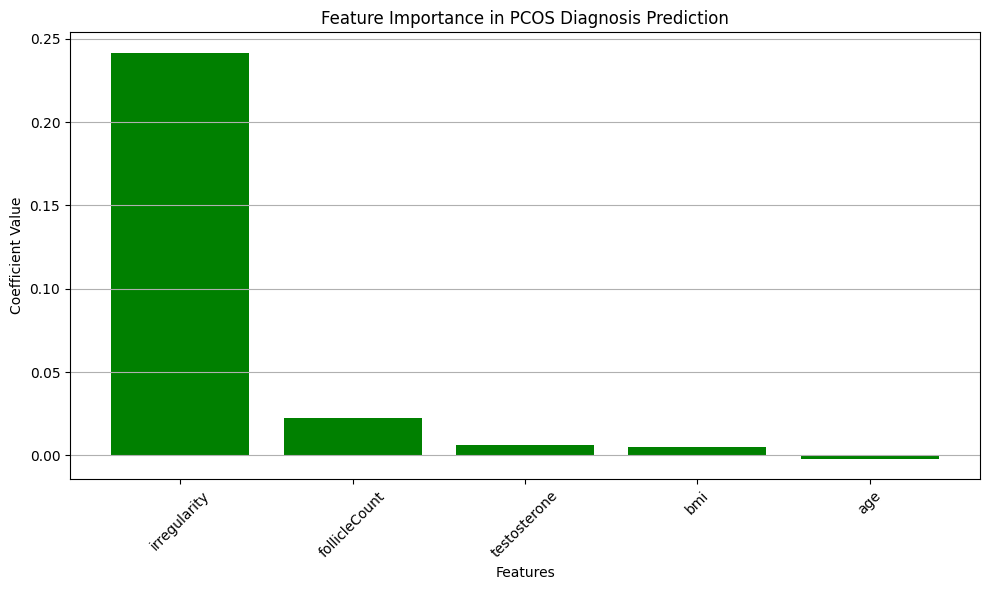

In [72]:
# WIP

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Multiple linear regression
# PCOS diagnosis = bmi + age + follicleCount + testosterone + irregularity

# Create X (features) and y (target)
X = pcos[['bmi', 'age', 'follicleCount', 'testosterone', 'irregularity']]
y = pcos['pcosDiagnosis']

# Fit the model
mlm = linear_model.LinearRegression()
mlm.fit(X, y)

# Make predictions
y_pred = mlm.predict(X)

# Convert predictions to binary (0 or 1) for classification metrics
y_pred_binary = np.where(y_pred >= 0.5, 1, 0)

# Model performance metrics
print("Model Performance Metrics:")
print("--------------------------")
print(f"R² Score: {r2_score(y, y_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y, y_pred):.4f}")
print(f"Accuracy: {accuracy_score(y, y_pred_binary):.4f}")


# Plot coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': mlm.coef_
})
coefficients = coefficients.sort_values('Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(coefficients['Feature'], coefficients['Coefficient'], color='green')
plt.title('Feature Importance in PCOS Diagnosis Prediction')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- last worked on 17 April 2025